# Homework of First week in CV class

In [ ]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

## 将图片按照灰度图读取

In [ ]:
#读入灰度图，0表示按照灰度图读取图片（读取当前目录下的图片）
img_grey = cv2.imread('lenna.jpg', 0)
#显示该图片，'lenna'表示显示图片的标题名称
cv2.imshow('lenna', img_grey)
#jupyter notebook中要输入以下代码，否则图片显示存在问题
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [ ]:
#显示该灰度图的图像数组：灰度图为二维矩阵
print(img_grey)

In [ ]:
#显示该灰度图图像数组中元素的数据类型：int8
print(img_grey.dtype)

In [ ]:
#显示该灰度图图像数组的大小：200*200
print(img_grey.shape)

## 按照彩色图格式读取图片

In [6]:
import cv2
#读入并显示lenna：原图即为彩色图像
img = cv2.imread('lenna.jpg')
cv2.imshow('lenna', img)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [30]:
#显示该图片的图像数组
print(img)
#显示该图片的数组大小：200*200*3
print(img.shape)
#img的类型为np数组
print(type(img))

[[[114 152 224]
  [114 154 226]
  [116 156 228]
  ...
  [118 151 220]
  [138 171 234]
  [130 164 224]]

 [[111 151 223]
  [112 154 225]
  [111 154 227]
  ...
  [115 147 212]
  [135 165 224]
  [142 173 228]]

 [[104 149 222]
  [105 150 223]
  [104 152 224]
  ...
  [ 84 112 172]
  [ 64  91 142]
  [ 62  88 135]]

 ...

 [[ 17  31  37]
  [ 23  37  43]
  [ 13  26  34]
  ...
  [ 22  43  71]
  [ 34  54  89]
  [ 36  57  95]]

 [[ 12  27  30]
  [ 22  36  42]
  [ 12  23  31]
  ...
  [ 36  55  88]
  [ 56  75 113]
  [ 56  77 122]]

 [[ 12  24  28]
  [ 24  36  42]
  [ 12  23  31]
  ...
  [ 44  62  99]
  [ 66  85 130]
  [ 67  86 137]]]
(200, 200, 3)
<class 'numpy.ndarray'>


## 图像处理

### 图片剪裁crop

In [8]:
#图片剪裁 img crop,采用数组切片的方式即可
img_crop = img[0:200, 0:100]
cv2.imshow('lenna_crop', img_crop)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### 颜色分解 color split

In [9]:
#颜色分解 color split：将图片按照颜色通道分解,Blue/Green/Red
B, G, R = cv2.split(img)
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### 随机改变图片颜色 change color

In [10]:
#颜色改变 color change
#利用随机数产生器，对图片颜色随机进行改变
def random_light_color(img):
    B, G, R = cv2.split(img)
    #在-50到50之间产生随机整数
    b_rand = random.randint(-50, 50)
    if b_rand == 0:
        pass
    #由于B、G、R通道中，代表颜色的整数均在0~255范围内，因此要进行一定处理，以防止数字超出范围
    elif b_rand > 0:
        #计算限值
        lim = 255 - b_rand
        #若加了该随机数后会超出255的B中元素，直接另其达到最大值255
        B[B>lim] = 255
        #其他不会超出255的元素，直接加该随机数
        B[B<lim] = (b_rand + B[B<lim]).astype(img.dtype)
    elif b_rand < 0:
        #计算限值
        lim = 0 - b_rand
        #加了该随机数后会小于0的B中元素，直接另其达到最小值0
        B[B < lim] = 0
        #其他不会低于0的元素，直接加该随机数
        B[B >= lim] = (b_rand + B[B >= lim]).astype(img.dtype)
    #对G、R作同样处理
    g_rand = random.randint(-50, 50)
    if g_rand == 0:
        pass
    elif g_rand > 0:
        lim = 255 - g_rand
        G[G > lim] = 255
        G[G <= lim] = (g_rand + G[G <= lim]).astype(img.dtype)
    elif g_rand < 0:
        lim = 0 - g_rand
        G[G < lim] = 0
        G[G >= lim] = (g_rand + G[G >= lim]).astype(img.dtype)

    r_rand = random.randint(-50, 50)
    if r_rand == 0:
        pass
    elif r_rand > 0:
        lim = 255 - r_rand
        R[R > lim] = 255
        R[R <= lim] = (r_rand + R[R <= lim]).astype(img.dtype)
    elif r_rand < 0:
        lim = 0 - r_rand
        R[R < lim] = 0
        R[R >= lim] = (r_rand + R[R >= lim]).astype(img.dtype)
    #将增加了随机数后的BGR数组组合起来，形成新的图片
    img_merge = cv2.merge((B, G, R))
    #img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img_merge

In [11]:
img_random_color = random_light_color(img)
cv2.imshow('radom_lenna', img_random_color)
key=cv2.waitKey() 
if key == 27:
    cv2.destroyAllWindows

### 伽马校正 gamma correction：伽马校正就是对图像的伽马曲线进行编辑，以对图像进行非线性色调编辑的方法，检出图像信号中的深色部分和浅色部分，并使两者比例增大，从而提高图像对比度效果。

In [12]:
#读取一张比较暗的图片
img_dark = cv2.imread('dark.jpg')
cv2.imshow('img_dark', img_dark)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

In [13]:
def adjust_gamma(img, gamma = 1.0):
    #build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
    invgamma = 1/gamma
    table = []
    for i in range(256):
        table.append(((i/255.0)**invgamma)*255)
    #将table list转为np数组
    table = np.array(table).astype("uint8")
    #The function LUT fills the output array with values from the look-up table
    return cv2.LUT(img, table)

In [14]:
img_brighter = adjust_gamma(img_dark, 2)
cv2.imshow('img_dark', img_dark)
cv2.imshow('img_brighter', img_brighter)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()

### 直方图 histogram

(array([1.5406e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.8125e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.8573e+04, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 8.4240e+03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 7.1580e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.0280e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.1370e+03,
        0.0000e+00, 0.0000e+00, 4.7190e+03, 0.0000e+00, 0.0000e+00,
        4.6880e+03, 0.0000e+00, 3.9170e+03, 0.0000e+00, 0.0000e+00,
        3.2590e+03, 0.0000e+00, 5.2650e+03, 0.0000e+00, 0.0000e+00,
        5.8400e+03, 0.0000e+00, 5.2480e+03, 0.0000e+00, 6.4120e+03,
        0.0000e+00, 8.9280e+03, 0.0000e+00, 7.7350e+03, 0.0000e+00,
        6.6850e+03, 0.0000e+00, 9.1800e+03, 0.0000e+00, 9.3520e+03,
        0.0000e+00, 7.2470e+03, 0.0000e+00, 9.07

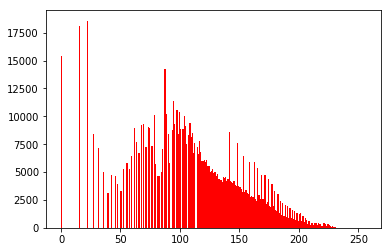

In [15]:
#缩小图片cv2.resize()
img_small_brighter = cv2.resize(img_brighter, (int(img_brighter.shape[0]*0.5), int(img_brighter.shape[1]*0.5)))
plt.hist(img_brighter.flatten(), 256, [0, 256], color = 'r')

#### 直方图均衡化：直方图均衡化是图像处理领域中利用图像直方图对对比度进行调整的方法。通过这种方法，亮度可以更好地在直方图上分布。这样就可以用于增强局部的对比度而不影响整体的对比度，直方图均衡化通过有效地扩展常用的亮度来实现这种功能。

In [16]:
#cv2.cvtColor()图像颜色空间转换,RGB转为YUV
img_yuv = cv2.cvtColor(img_small_brighter, cv2.COLOR_BGR2YUV)
# 使Y通道的直方图均衡化，equalize the histogram of the Y channel
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])   # only for 1 channel
# 将YUV图片转回RGB格式,convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)   # y: luminance(明亮度), u&v: 色度饱和度
cv2.imshow('Color input image', img_small_brighter)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey(0)
if key == 27:
    exit()

### 旋转rotation

In [38]:
#创建一个二维选装矩阵？需输入中心点、角度、缩放大小？
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 1) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

In [39]:
print(M)

[[  0.8660254    0.5        -36.60254038]
 [ -0.5          0.8660254   63.39745962]]


In [40]:
M[0][2] = 0
M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]


In [41]:
# scale+rotation+translation = similarity transform 缩放+旋转+平移=相似变换
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[ 0.4330127   0.25       31.69872981]
 [-0.25        0.4330127  81.69872981]]


### 仿射变换 Affine Transform

In [25]:
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

cv2.imshow('affine lenna', dst)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()


### 投影变换 perspective transform

In [27]:
def random_warp(img, row, col):
    height, width, channels = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

In [29]:
M_warp, img_warp = random_warp(img, img.shape[0], img.shape[1])
cv2.imshow('lenna_warp', img_warp)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

# 将部分图像处理功能打包为data_augmentation

In [2]:
import data_augmentation
import cv2

In [9]:
img = cv2.imread('dark.jpg')
img_gama = data_augmentation.adjust_gamma(img, 1.0)
cv2.imshow('dark_gama', img_gama)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()
